# TRABALHO DE IAA015 – Tópicos de Inteligência Artificial

## Equipe 03
* Gustavo Costa de Souza
* Marcos Vinicius de Melo
* Marcus Eneas Silveira Galvao do Rio Apa II
* Patrícia Verdugo Pascoal
* Rodrigo de Araujo
* William de Souza Alencar

Este trabalho deve ser realizado em equipes de 3 a 6 integrantes. 
Adicionar o NOME COMPLETO de todos os integrantes da equipe. 
Entregar como um documento PDF com todas as respostas. 
 
ATENÇÃO:  É  UM  trabalho  nessa  disciplina  formado  por  DOIS  exercícios:  (1)  algoritmo  genético;  (2) 
visualização com a PCA de dois modelos vetoriais do mesmo texto. 
 
Cada questão tem o peso de 50% da nota. 

1) Algoritmo Genético  
Problema do Caixeiro Viajante 
 
A Solução poderá ser apresentada em: Python (preferencialmente), ou em R, ou em Matlab, ou em C ou 
em Java. 
 
Considere o seguinte problema de otimização (a escolha do número de 100 cidades foi feita simplesmente 
para tornar o problema intratável. A solução ótima para este problema não é conhecida). 
 
Suponha  que  um  caixeiro  deva  partir  de  sua  cidade,  visitar  clientes  em  outras  99  cidades  diferentes,  e 
então  retornar  à  sua  cidade.  Dadas  as  coordenadas  das  100  cidades,  descubra  o  percurso  de  menor 
distância que passe uma única vez por todas as cidades e retorne à cidade de origem. 
 
Para  tornar  a  coisa  mais  interessante,  as  coordenadas  das  cidades  deverão  ser  sorteadas  (aleatórias), 
considere que cada cidade possui um par de coordenadas (x e y) em um espaço limitado de 100 por 100 
pixels. 
 
O  relatório  deverá  conter  no  mínimo  a  primeira  melhor  solução  (obtida  aleatoriamente  na  geração  da 
população inicial) e a melhor solução obtida após um número mínimo de 1000 gerações. Gere as imagens 
em 2d dos pontos (cidades) e do caminho. 
 
Sugestão:  
(1) considere o cromossomo formado pelas cidades, onde a cidade de início (escolhida 
aleatoriamente) deverá estar na posição 0 e 100 e a ordem das cidades visitadas nas posições de 
1 a 99 deverão ser definidas pelo algoritmo genético. 
(2) A função de avaliação deverá minimizar a distância euclidiana entre as cidades (os pontos). 
(3) Utilize no mínimo uma população com 100 indivíduos; 
(4) Utilize no mínimo 1% de novos indivíduos obtidos pelo operador de mutação; 
(5) Utilize no mínimo de 90% de novos indivíduos obtidos pelo método de cruzamento (crossover-
ox); 
(6) Preserve sempre a melhor solução de uma geração para outra. 
 
Importante: A solução deverá implementar os operadores de “cruzamento” e “mutação”.

In [70]:
import math
import matplotlib.pyplot as plt
import random

# constantes
num_cidades = 100

# lista com as coordenadas  das  cidades  deverão  ser  sorteadas  (aleatórias), considere que cada cidade possui um par de coordenadas (x e y) em um espaço limitado de 100 por 100 pixels.
def gerar_coordenadas(num_cidades):
    coordenadas = []
    for _ in range(num_cidades):
        x = random.randint(0, 100)
        y = random.randint(0, 100)
        coordenadas.append((x, y))
    return coordenadas

coordenadas_cidades = gerar_coordenadas(num_cidades)
print(coordenadas_cidades)


[(43, 75), (52, 98), (11, 1), (10, 79), (53, 13), (60, 94), (64, 51), (86, 97), (31, 74), (37, 74), (43, 45), (17, 41), (9, 80), (87, 98), (3, 51), (7, 72), (24, 29), (35, 42), (54, 61), (34, 98), (18, 34), (41, 11), (80, 22), (40, 6), (36, 6), (66, 2), (6, 91), (99, 63), (7, 37), (23, 94), (25, 26), (18, 9), (30, 47), (44, 4), (46, 66), (63, 59), (81, 8), (46, 33), (71, 31), (29, 25), (71, 26), (4, 96), (18, 52), (60, 52), (4, 39), (95, 11), (33, 43), (44, 94), (1, 34), (48, 78), (32, 47), (95, 26), (51, 92), (98, 87), (74, 78), (39, 30), (48, 98), (63, 53), (40, 21), (21, 88), (99, 94), (29, 56), (59, 38), (74, 26), (16, 44), (39, 24), (19, 100), (8, 49), (91, 98), (81, 16), (13, 53), (93, 91), (70, 55), (68, 6), (20, 47), (12, 76), (74, 77), (65, 99), (13, 88), (93, 6), (39, 19), (28, 12), (62, 56), (46, 39), (89, 29), (94, 30), (23, 82), (43, 62), (6, 59), (84, 88), (33, 90), (76, 43), (75, 8), (3, 96), (74, 26), (21, 89), (76, 29), (19, 40), (65, 46), (67, 56)]


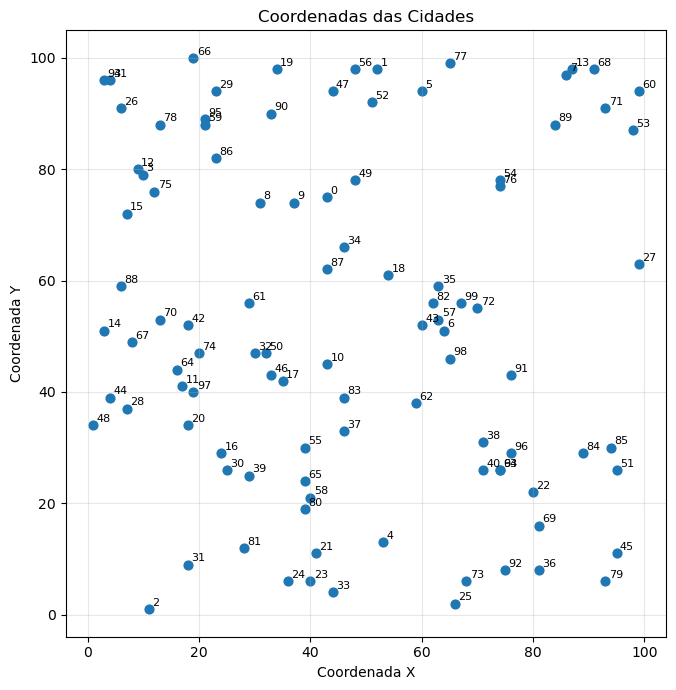

In [71]:
# plotar coordenadas_cidades
xs, ys = zip(*coordenadas_cidades)

plt.figure(figsize=(7,7))
plt.scatter(xs, ys, color='tab:blue', s=40)
for i, (x, y) in enumerate(coordenadas_cidades):
    plt.text(x + 0.6, y + 0.6, str(i), fontsize=8)  # rótulo com índice da cidade

plt.title("Coordenadas das Cidades")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [72]:
# um  caixeiro  deva  partir  de  sua  cidade,  visitar  clientes  em  outras  99  cidades  diferentes,  e 
# então  retornar  à  sua  cidade.  Dadas  as  coordenadas  das  100  cidades,  descubra  o  percurso  de  menor 
# distância que passe uma única vez por todas as cidades e retorne à cidade de origem

def calcular_distancia(cidade1, cidade2):
    return math.sqrt((cidade1[0] - cidade2[0]) ** 2 + (cidade1[1] - cidade2[1]) ** 2)

def calcular_percurso_total(percurso, coordenadas):
    distancia_total = 0
    for i in range(len(percurso) - 1):
        distancia_total += calcular_distancia(coordenadas[percurso[i]], coordenadas[percurso[i + 1]])
    distancia_total += calcular_distancia(coordenadas[percurso[-1]], coordenadas[percurso[0]])
    return distancia_total

In [ ]:
# (3) Utilize no mínimo uma população com 100 indivíduos
TAMANHO_POPULACAO = 100
NUMERO_GERACOES = 1000

# (1) considere o cromossomo formado pelas cidades, onde a cidade de início (escolhida 
# aleatoriamente) deverá estar na posição 0 e 100 e a ordem das cidades visitadas nas posições de 
# 1 a 99 deverão ser definidas pelo algoritmo genético.
def populacaoInicial(tamanho, coordenadas_cidades):
    resultado = []
    n = len(coordenadas_cidades)
    for _ in range(tamanho):
        cidades_intermediarias = list(range(1, n))  # cidades 1 até n-1
        random.shuffle(cidades_intermediarias)
        rota = [0] + cidades_intermediarias + [0]   # começa e termina na cidade 0
        resultado.append(rota)
    return resultado

# (2) A função de avaliação deverá minimizar a distância euclidiana entre as cidades (os pontos).
def avaliacao(populacao, coordenadas_cidades):
  fit = []
  for v in populacao:
    fx = calcular_percurso_total(v, coordenadas_cidades)
    if fx == 0:
      fit.append( 999999 )
    else:
      fit.append( abs(1/fx) )
  return fit

def preservaMelhor(geracao, nova, coordenadas_cidades):
  ava = avaliacao(geracao, coordenadas_cidades)
  maior = 0
  for i in range(1,len(ava)):
    #print(f'comparando {maior} ({geracao[maior]} : {ava[maior]}) com {i} ({geracao[i]} :{ava[i]}) ')
    if ava[maior] < ava[i]:
      maior = i
  nova.append( geracao[maior] )
  #print('melhor: ', nova, geracao[maior])
  return geracao[maior]

def bit2vet(valor):
  res = []
  for i in range(0,32):
    if valor & (0x01<<i) > 0:
      res.insert(0,1)
    else:
      res.insert(0,0)
  return res

def bin2num(vet):
  num = 0
  if vet[0] == 1:
    # num negativos
    for i in range(1,32):
      if vet[i]==0:
        num = num + 2**(31-i)
    num = -1 - num
  else:
    for i in range(1,32):
      if vet[i]>0:
        num = num + 2**(31-i)
  return num

def order_crossover(p1, p2):
    """Order Crossover (OX) para permutações (rotas)"""
    n = len(p1)
    
    # Seleciona pontos de corte
    a, b = sorted(random.sample(range(1, n-1), 2))
    
    # Inicializa filho
    child = [0] + [-1] * (n-2) + [0]
    
    # 1. Copia segmento de p1 para o filho
    child[a:b] = p1[a:b]
    
    # 2. Coleta genes de p2 que não estão no segmento copiado
    genes_para_adicionar = []
    for gene in p2[1:-1]:
        if gene not in child:
            genes_para_adicionar.append(gene)
    
    # 3. Lista de posições vazias
    posicoes_vazias = [i for i in range(1, n-1) if child[i] == -1]
    
    # 4. Preenche posições vazias com genes de p2
    for i, pos in enumerate(posicoes_vazias):
        if i < len(genes_para_adicionar):
            child[pos] = genes_para_adicionar[i]
    
    # 5. Se ainda houver posições vazias, preenche com genes faltantes
    genes_usados = set(child[1:-1])
    todos_genes = set(range(1, n-1))
    genes_faltantes = list(todos_genes - genes_usados)
    
    for i in range(1, n-1):
        if child[i] == -1:
            child[i] = genes_faltantes.pop()
    
    return child

def cruzamento(pop, qdade, nova):
    """
    Gera `qdade` filhos válidos a partir da população `pop` usando OX.
    Adiciona os filhos na lista `nova`.
    """
    qdeSaida = len(nova) + qdade
    while len(nova) < qdeSaida:
        indA, indB = random.sample(range(len(pop)), 2)
        p1 = pop[indA]
        p2 = pop[indB]
        # gera dois filhos (troca ordem dos pais)
        f1 = order_crossover(p1, p2)
        f2 = order_crossover(p2, p1)
        nova.append(f1)
        if len(nova) < qdeSaida:
            nova.append(f2)

def mutacao(pop, qdade, nova):
    """
    Mutação para população de permutações (TSP).
    Realiza swap mutation: escolhe um indivíduo pai aleatório, copia e troca duas posições.
    Adiciona `qdade` filhos mutados na lista `nova`.
    """
    qdeSaida = len(nova) + qdade
    n = len(pop[0])
    while len(nova) < qdeSaida:
        pai = random.choice(pop)
        filho = pai.copy()
        i, j = random.sample(range(n), 2)
        filho[i], filho[j] = filho[j], filho[i]
        nova.append(filho)

In [74]:
# passo 1
p0 = populacaoInicial(TAMANHO_POPULACAO, coordenadas_cidades)
print("Pop inicial: ", p0)

# avalia a pop. inicial
a0 = avaliacao(p0, coordenadas_cidades)
print("Avaliação", a0)

# fazemos a iteração, passos 3,4 e 5 do AG
geracao = p0
numGeracoes = NUMERO_GERACOES
while numGeracoes>0:
  nova = []
  # (6) Preserve sempre a melhor solução de uma geração para outra.
  preservaMelhor(geracao, nova, coordenadas_cidades)
  # (5) Utilize no mínimo de 90% de novos indivíduos obtidos pelo método de cruzamento (crossover-ox);
  qtd_cruzamento = int(0.90 * TAMANHO_POPULACAO)
  cruzamento(geracao, qtd_cruzamento, nova)
  # (4) Utilize no mínimo 1% de novos indivíduos obtidos pelo operador de mutação;
  qtd_mutacao = max(1, int(0.01 * TAMANHO_POPULACAO))
  mutacao(geracao, qtd_mutacao, nova)
  # completa até o tamanho desejado
  while len(nova) < TAMANHO_POPULACAO:
      cruzamento(geracao, qtd_cruzamento, nova)
  numGeracoes=numGeracoes-1  
  av = avaliacao(nova, coordenadas_cidades)
  # ordena a geracao com base na avaliacao
  nova2 = sorted(zip(av,nova),reverse=True)
  geracao = [x for _,x in nova2]
  if numGeracoes % 100 == 0:
    print( f'Geracao {numGeracoes} melhor = {calcular_percurso_total(geracao[0], coordenadas_cidades)}' )

print(f'A primeira melhor solucao encontrada: {calcular_percurso_total(geracao[-1], coordenadas_cidades)}, {geracao[-1]}')
print(f'A melhor solucao encontrada: distancia = {calcular_percurso_total(geracao[0], coordenadas_cidades)}, {geracao[0]}')

Pop inicial:  [[0, 50, 51, 44, 6, 15, 19, 56, 91, 21, 81, 83, 64, 78, 79, 89, 98, 68, 3, 97, 33, 47, 96, 58, 24, 40, 69, 11, 84, 82, 41, 86, 93, 9, 74, 76, 73, 32, 92, 20, 95, 35, 13, 75, 61, 71, 29, 26, 87, 99, 88, 46, 62, 60, 30, 54, 1, 37, 7, 49, 38, 77, 70, 12, 80, 72, 59, 28, 45, 85, 66, 55, 42, 14, 90, 65, 18, 17, 34, 8, 67, 27, 22, 23, 31, 16, 2, 36, 63, 43, 53, 39, 48, 94, 25, 10, 5, 52, 4, 57, 0], [0, 35, 29, 81, 86, 32, 22, 65, 20, 47, 16, 90, 25, 42, 49, 73, 8, 2, 76, 80, 93, 50, 11, 23, 15, 53, 6, 88, 1, 66, 9, 12, 39, 46, 36, 34, 30, 43, 70, 71, 21, 24, 87, 55, 89, 51, 28, 75, 94, 77, 58, 79, 99, 69, 54, 14, 96, 57, 82, 26, 98, 78, 19, 83, 13, 33, 38, 4, 97, 37, 52, 92, 63, 7, 18, 48, 10, 67, 61, 3, 17, 45, 72, 68, 60, 31, 27, 95, 5, 64, 62, 44, 59, 85, 84, 74, 91, 40, 41, 56, 0], [0, 64, 39, 83, 13, 61, 67, 82, 55, 49, 88, 56, 12, 9, 72, 91, 47, 2, 24, 26, 27, 43, 51, 32, 68, 25, 66, 69, 96, 92, 7, 53, 11, 86, 48, 35, 94, 54, 34, 40, 33, 41, 65, 89, 4, 97, 73, 1, 45, 6, 1

In [75]:
def plotar_geracao(melhor_rota, coordenadas_cidades, titulo, color_line):
    xs_melhor_rota = [coordenadas_cidades[i][0] for i in melhor_rota] + [coordenadas_cidades[melhor_rota[0]][0]]
    ys_melhor_rota = [coordenadas_cidades[i][1] for i in melhor_rota] + [coordenadas_cidades[melhor_rota[0]][1]]
    plt.figure(figsize=(7,7))
    plt.plot(xs_melhor_rota, ys_melhor_rota, '-o', color=color_line, alpha=0.8)
    plt.scatter(xs, ys, color='tab:blue', s=40)
    for i, (x, y) in enumerate(coordenadas_cidades):
        plt.text(x + 0.6, y + 0.6, str(i), fontsize=8)
    distancia_melhor = calcular_percurso_total(melhor_rota, coordenadas_cidades)
    plt.title(f"{titulo} - Distância ≈ {distancia_melhor:.2f}")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(alpha=0.3)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()

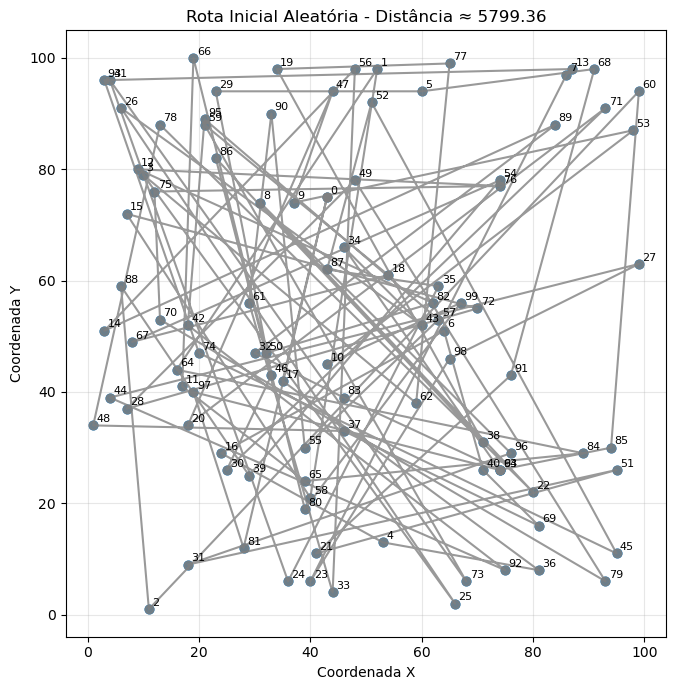

In [76]:
#plotar a rota inicial
plotar_geracao(geracao[-1], coordenadas_cidades, "Rota Inicial Aleatória", 'gray')

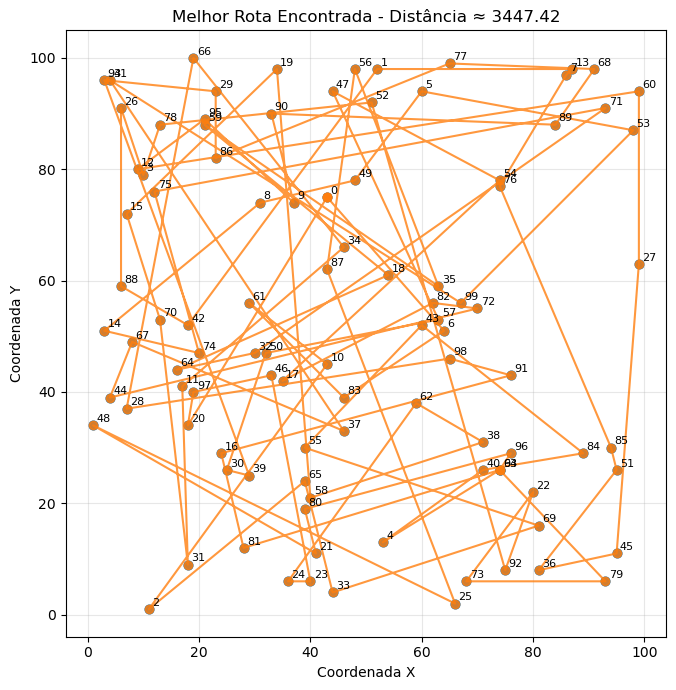

In [77]:
#plotar a melhor rota encontrada
plotar_geracao(geracao[0], coordenadas_cidades, "Melhor Rota Encontrada", 'tab:orange')

2) Compare a representação de dois modelos vetoriais  

Pegue um texto relativamente pequeno, o objetivo será visualizar a representação vetorial, que poderá 
ser um vetor por palavra ou por sentença. Seja qual for a situação, considere a quantidade de palavras ou 
sentenças onde tenha no mínimo duas similares e no mínimo 6 textos, que deverão produzir no mínimo 
6 vetores. Também limite o número máximo, para que a visualização fique clara e objetiva. 
 
O  trabalho  consiste  em  pegar  os  fragmentos  de  texto  e  codificá-las  na  forma  vetorial.  Após  obter  os 
vetores, imprima-os em figuras (plot) que demonstrem a projeção desses vetores usando a PCA. 
 
O PDF deverá conter o código-fonte e as imagens obtidas.